In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preliminary Analysis

In [2]:
data = pd.read_excel(r"D:\DS Course corizo\Flight fare prediction\Data_Train.xlsx")

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.shape

(10683, 11)

In [6]:
data.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [7]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
data.isna()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
data[data["Route"].isna() | data["Total_Stops"].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [12]:
data.dropna(inplace = True)

In [13]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
data.count()


Airline            10682
Date_of_Journey    10682
Source             10682
Destination        10682
Route              10682
Dep_Time           10682
Arrival_Time       10682
Duration           10682
Total_Stops        10682
Additional_Info    10682
Price              10682
dtype: int64

## Preprocess The Data

This is to convert the values in the features to a numeric value

 ### DURATION

In [15]:
def convert_duration(duration):
    if len(duration.split()) == 2:
        hours =int(duration.split()[0][: -1])
        minute =int(duration.split()[1][: -1])
        return hours * 60 + minute
    else:
        return int(duration[: -1]) * 60

In [16]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [17]:
data["Duration"] = data["Duration"].apply(convert_duration)

#### Dont mind this error. This is because this line of code need to be run only once.

In [18]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,180,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,non-stop,No info,12648


## DEPARTURE AND ARRIVAL TIME

In [19]:
data["Dep_Time"] = pd.to_datetime(data["Dep_Time"])
data["Arrival_Time"] = pd.to_datetime(data["Arrival_Time"])

C:\Users\kevin\AppData\Local\Temp\ipykernel_10972\1421042291.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dep_Time"] = pd.to_datetime(data["Dep_Time"])
C:\Users\kevin\AppData\Local\Temp\ipykernel_10972\1421042291.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Arrival_Time"] = pd.to_datetime(data["Arrival_Time"])


In [20]:
data.dtypes

Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                    int64
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [21]:
data["Dep_Time_in_hours"] = data["Dep_Time"].dt.hour
data["Dep_Time_in_minutes"] = data["Dep_Time"].dt.minute
data["Arrival_Time_in_hours"] = data["Arrival_Time"].dt.hour
data["Arrival_Time_in_minutes"] = data["Arrival_Time"].dt.minute

data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2024-04-11 22:20:00,2024-03-22 01:10:00,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-11 05:50:00,2024-04-11 13:15:00,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2024-04-11 09:25:00,2024-06-10 04:25:00,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2024-04-11 18:05:00,2024-04-11 23:30:00,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2024-04-11 16:50:00,2024-04-11 21:35:00,285,1 stop,No info,13302,16,50,21,35


In [22]:
data.drop(['Dep_Time','Arrival_Time'], axis=1, inplace= True)

In [23]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35


## DATE OF JOURNEY

In [24]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])

C:\Users\kevin\AppData\Local\Temp\ipykernel_10972\541364744.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])


In [25]:
data['Date_of_Journey'].dt.year.unique()

array([2019])

Since there is only one year, extracting year is useless. So it is avoided

In [26]:
data['Day'] = data['Date_of_Journey'].dt.day
data['Month'] = data['Date_of_Journey'].dt.month

data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,1,3


In [27]:
data.drop(["Date_of_Journey"], axis=1, inplace= True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,1,3


## TOTAL STOPS

In [28]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [29]:
def convert_stops(stop):
    if len(stop) == 2:
        num_of_stops = int(stop.split()[0])
        return num_of_stops
    else:
        return 0
    
    
# OR


data["Total_Stops"] = data['Total_Stops'].map({
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
})

In [30]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,16,50,21,35,1,3


## ADDITIONAL INFO

In [31]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [32]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

Since the majority of values dont have info, its better to drop the column

In [33]:
data.drop(['Additional_Info'], axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3


To check which all columns have object datatypes

In [34]:
data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

To Visualise the relation of price with these features, we do the following

Airline


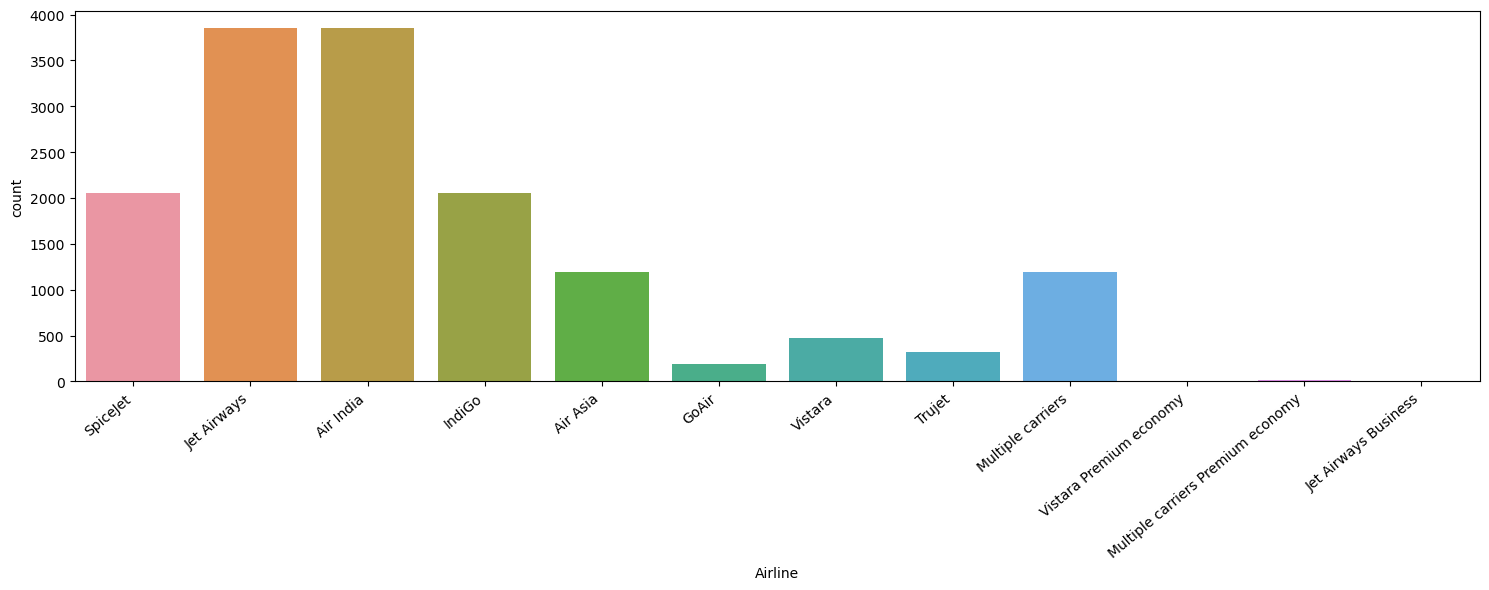




Source


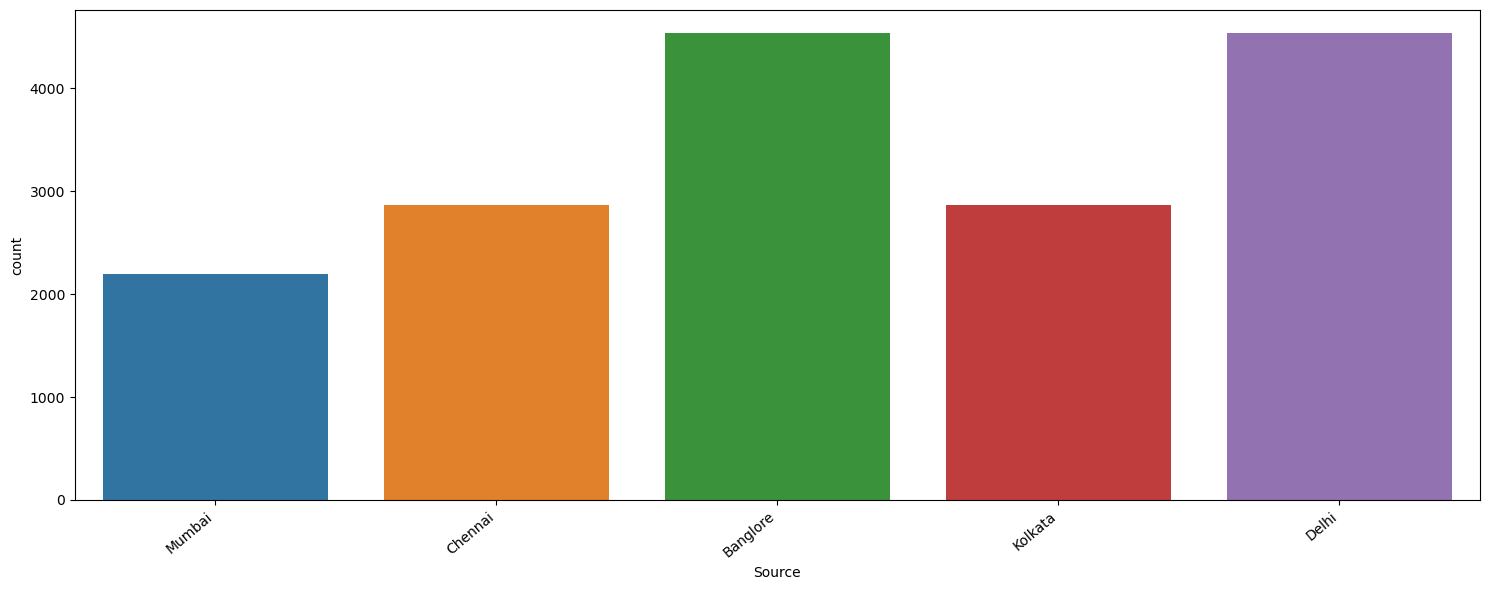




Destination


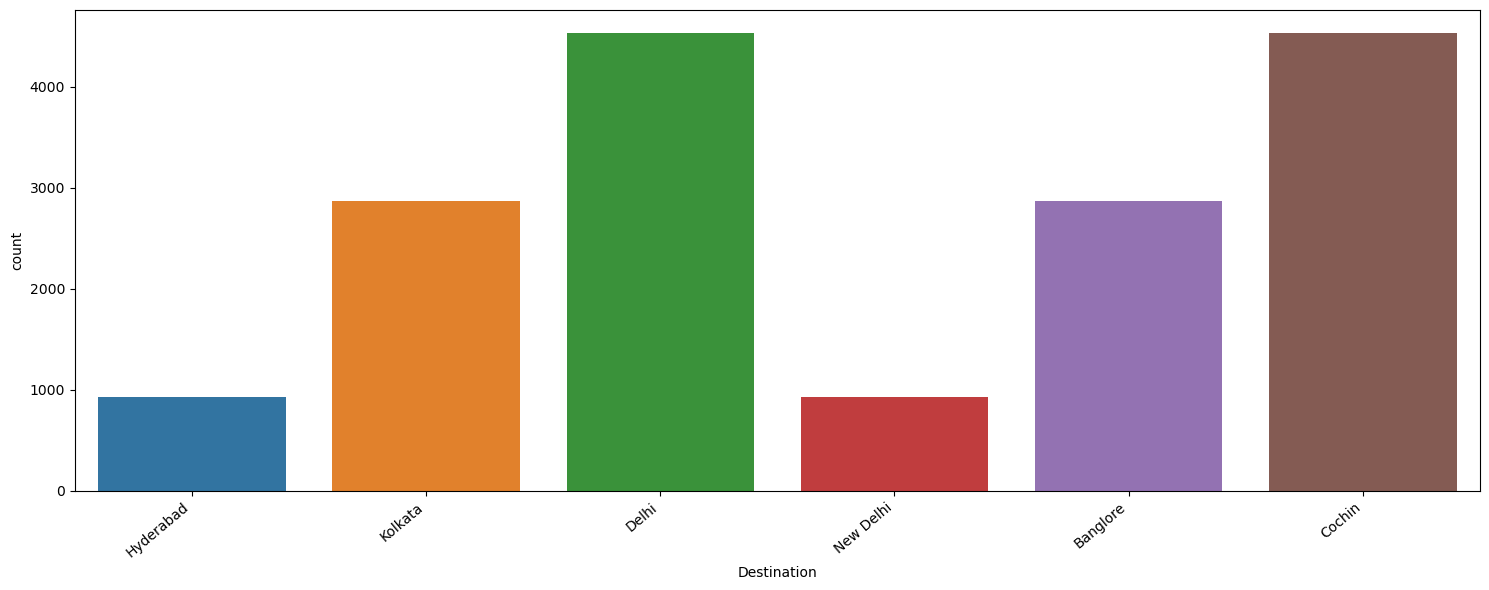




Route


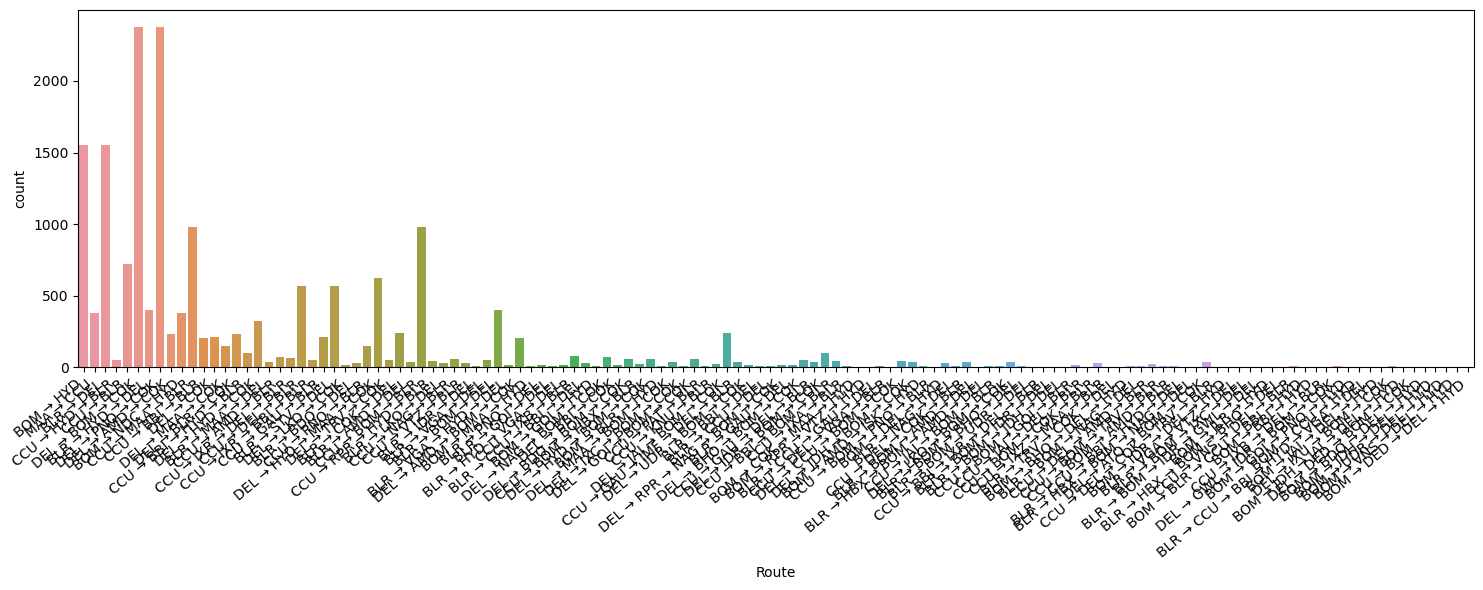

In [35]:
for i in ['Airline', 'Source', 'Destination', 'Route']:
    plt.figure(figsize=(15, 6))
    sns.countplot(data = data,x = i)
    ax = sns.countplot(x = i, data = data.sort_values('Price', ascending = True))
    #To set labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
    plt.tight_layout()
    print(i)
    plt.show()
    print('\n\n')

## AIRLINE

In [36]:
data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

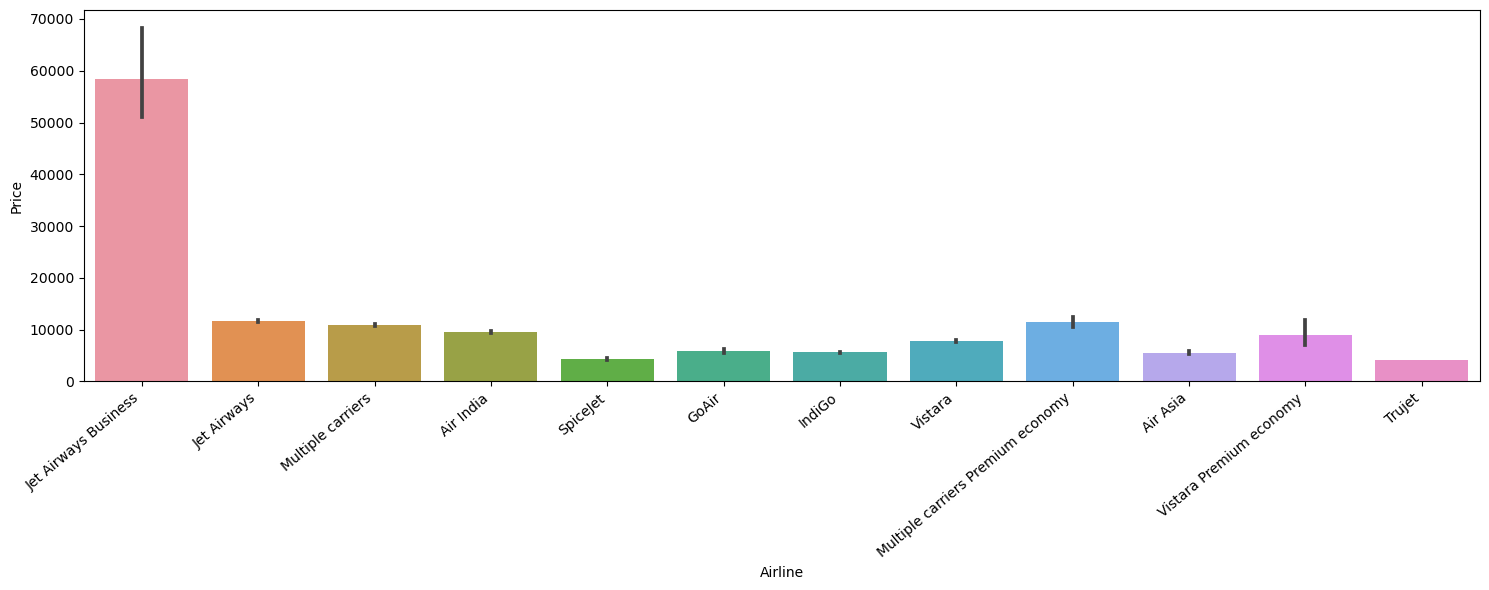

In [37]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x = 'Airline' , y = 'Price' , data=data.sort_values('Price', ascending = False))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha= 'right')
plt.tight_layout()
plt.show()

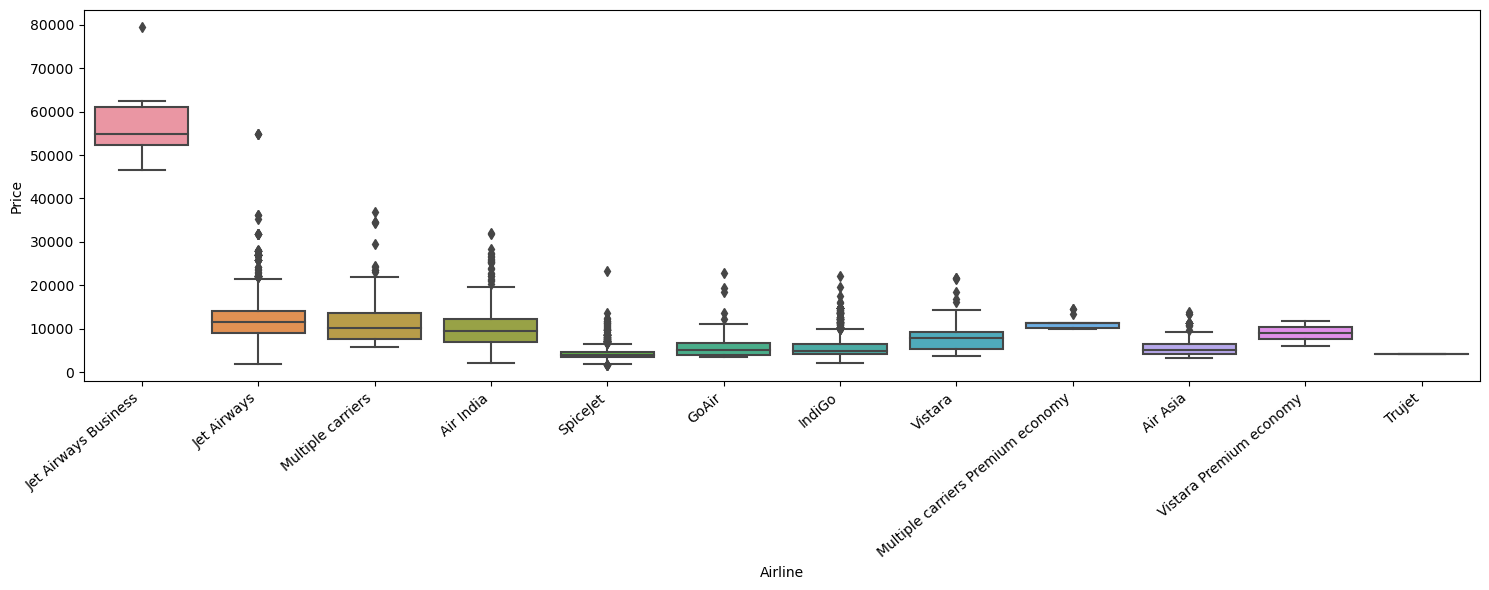

In [38]:
plt.figure(figsize=(15,6))
ax = sns.boxplot(x = 'Airline' , y = 'Price' , data=data.sort_values('Price', ascending = False))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha= 'right')
plt.tight_layout()
plt.show()

In [39]:
data.groupby('Airline').describe()['Price'].sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.0,54747.0,61122.50,79512.0
Jet Airways,3849.0,11643.923357,4258.940578,1840.0,9134.0,11467.0,14151.00,54826.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0
Air India,1751.0,9612.427756,3901.734561,2050.0,6891.0,9443.0,12219.00,31945.0
Vistara Premium economy,3.0,8962.333333,2915.405518,5969.0,7547.0,9125.0,10459.00,11793.0
Vistara,479.0,7796.348643,2914.298578,3687.0,5403.0,7980.0,9345.00,21730.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0


To convert this object type feature into numerical values, we have to perform encoding

Here, we use one hot encoding

In [40]:
Airline = pd.get_dummies(data['Airline'], drop_first = True, dtype=int) #This is for creating one hot encoding for Airline
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [41]:
data = pd.concat([data, Airline], axis = 1)

In [42]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,...,0,1,0,0,0,0,0,0,0,0


In [43]:
data.drop('Airline', axis=1, inplace=True)
data.head()

,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,...,0,1,0,0,0,0,0,0,0,0


## SOURCE AND DESTINATION

In [44]:
list1 = ['Source','Destination']
for l in list1:
    print(data[l].value_counts(), '\n')

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64 

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64 



In [45]:
data = pd.get_dummies(data = data, columns = list1, drop_first = True, dtype=int)

In [46]:
data.head()

,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,170,0,3897,22,20,1,10,24,3,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3,...,0,0,0,0,0,0,0,0,0,1


## ROUTE

In [47]:
route = data[['Route']] #Double box bracket makes it a dataframe
route.head()

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


Hmm, but we can understand that there will only be max 4 stops, as we have already found out total stops.
So, Route can be 0,1,2,3,4

In [48]:
data['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [49]:
route['Route_1']=route['Route'].str.split('→').str[0]
route['Route_2']=route['Route'].str.split('→').str[1]
route['Route_3']=route['Route'].str.split('→').str[2]
route['Route_4']=route['Route'].str.split('→').str[3]
route['Route_5']=route['Route'].str.split('→').str[4]

route.head()

C:\Users\kevin\AppData\Local\Temp\ipykernel_10972\3212133790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_1']=route['Route'].str.split('→').str[0]
C:\Users\kevin\AppData\Local\Temp\ipykernel_10972\3212133790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_2']=route['Route'].str.split('→').str[1]
C:\Users\kevin\AppData\Local\Temp\ipykernel_10972\3212133790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [50]:
route.fillna('None', inplace = True)
route.head()

C:\Users\kevin\AppData\Local\Temp\ipykernel_10972\2171952904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.fillna('None', inplace = True)


,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
4,BLR → NAG → DEL,BLR,NAG,DEL,None,None


Here, since there are a lot of values, One hot encoder will take time to process. So, we use Label Encoder

In [51]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in range(1,6):
    col = 'Route_' + str(i)
    route[col] = le.fit_transform(route[col]) #This method performs Label Encoding
    
route.head()

C:\Users\kevin\AppData\Local\Temp\ipykernel_10972\4064674885.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col] = le.fit_transform(route[col]) #This method performs Label Encoding
C:\Users\kevin\AppData\Local\Temp\ipykernel_10972\4064674885.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col] = le.fit_transform(route[col]) #This method performs Label Encoding
C:\Users\kevin\AppData\Local\Temp\ipykernel_10972\4064674885.py:6: SettingWithCopyWarning: 
A value is trying to be set on a cop

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,25,1,3,5
2,DEL → LKO → BOM → COK,3,32,4,5,5
3,CCU → NAG → BLR,2,34,3,13,5
4,BLR → NAG → DEL,0,34,8,13,5


In [52]:
route.drop('Route', axis=1, inplace=True)

C:\Users\kevin\AppData\Local\Temp\ipykernel_10972\521362078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.drop('Route', axis=1, inplace=True)


In [53]:
route.head()

,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,13,29,13,5
1,2,25,1,3,5
2,3,32,4,5,5
3,2,34,3,13,5
4,0,34,8,13,5


In [54]:
data = pd.concat([data,route],axis=1)
data.head()

,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,170,0,3897,22,20,1,10,24,3,...,0,0,0,0,1,0,13,29,13,5
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5,...,0,0,0,0,0,2,25,1,3,5
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6,...,1,0,0,0,0,3,32,4,5,5
3,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5,...,0,0,0,0,0,2,34,3,13,5
4,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3,...,0,0,0,0,1,0,34,8,13,5


In [55]:
data.drop('Route', axis=1, inplace=True)

In [56]:
data.head()

,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,Air India,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,170,0,3897,22,20,1,10,24,3,0,...,0,0,0,0,1,0,13,29,13,5
1,445,2,7662,5,50,13,15,1,5,1,...,0,0,0,0,0,2,25,1,3,5
2,1140,2,13882,9,25,4,25,9,6,0,...,1,0,0,0,0,3,32,4,5,5
3,325,1,6218,18,5,23,30,12,5,0,...,0,0,0,0,0,2,34,3,13,5
4,285,1,13302,16,50,21,35,1,3,0,...,0,0,0,0,1,0,34,8,13,5


Now,all the columns are in numerical format. Data is clean

# Building The ML Model and Evaluating

First, Normalization is done to reduce all the columns into a common range, so as to find the relation between the inputs and the required output

In [57]:
temp_col = data.columns.to_list()
print(temp_col, '\n')

new_col=temp_col[: 2]+temp_col[3 :]
new_col.append(temp_col[2])
print(new_col, '\n')

data = data.reindex(columns =new_col) #This method is used to reindex a DataFrame
data.head()

['Duration', 'Total_Stops', 'Price', 'Dep_Time_in_hours', 'Dep_Time_in_minutes', 'Arrival_Time_in_hours', 'Arrival_Time_in_minutes', 'Day', 'Month', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'] 

['Duration', 'Total_Stops', 'Dep_Time_in_hours', 'Dep_Time_in_minutes', 'Arrival_Time_in_hours', 'Arrival_Time_in_minutes', 'Day', 'Month', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 

,Duration,Total_Stops,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,Air India,GoAir,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5,Price
0,170,0,22,20,1,10,24,3,0,0,...,0,0,0,1,0,13,29,13,5,3897
1,445,2,5,50,13,15,1,5,1,0,...,0,0,0,0,2,25,1,3,5,7662
2,1140,2,9,25,4,25,9,6,0,0,...,0,0,0,0,3,32,4,5,5,13882
3,325,1,18,5,23,30,12,5,0,0,...,0,0,0,0,2,34,3,13,5,6218
4,285,1,16,50,21,35,1,3,0,0,...,0,0,0,1,0,34,8,13,5,13302


In [62]:
from sklearn.preprocessing import StandardScaler #For Normalization

scaler = StandardScaler()
data = scaler.fit_transform(data)

len(data[0])

34

Now we have to split the data for test and train

In [63]:
from sklearn.model_selection import train_test_split as tts

In [64]:
x = data[:, : -1] #All rows and Columns excluding Price as X
y = data[:, -1] #All rows and Price column as y

In [65]:
x_train, x_test, y_train, y_test = tts(x,y, test_size = 0.1, random_state = 69) 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9613, 33)
(1069, 33)
(9613,)
(1069,)


Test size is 10% of data and using the same random_state ensures that the split is the same each time you run the code.
This is useful for debugging and comparing different models.

## Linear Regression Model

In [66]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Error and Accuracy Calculation

In [67]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print("RMSE:", mean_squared_error(y_true,y_pred)**0.5 ) #Root mean squared Error
    print("R_Squared Error:", r2_score(y_true,y_pred))
    
def accuracy(y_true,y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true) #Mean Arithmetic Percentage Error
    accuracy = 100 - mape
    return accuracy

In [68]:
y_pred = model.predict(x_test)

In [69]:
metrics(y_test, y_pred)

RMSE: 0.5321162379189209
R_Squared Error: 0.6513979045879807


In [70]:
accuracy(y_test, y_pred)

72.53575756332461

## Random Forest Model

In [71]:
from sklearn.ensemble import RandomForestRegressor 

model_random_forest = RandomForestRegressor(n_estimators = 500 , min_samples_split = 3)
model_random_forest.fit(x_train, y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=500)

n_estimators => number of trees in the forest. More number of trees means more accuracy, but also more computational time

min_samples_split => minimum number of samples required to split an internal node. Control the complexity of model and reduce overfitting 

In [72]:
pred_rf = model_random_forest.predict(x_test)

In [73]:
metrics(y_test, pred_rf)

RMSE: 0.3741200473293867
R_Squared Error: 0.8276787125690547


In [74]:
accuracy(y_test,pred_rf)

97.52434768604702